In [147]:
# Nasser Althaiban         HW3                    800764203

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from matplotlib.colors import ListedColormap

In [148]:
breast = load_breast_cancer()

In [149]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [150]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [151]:
breast_labels = breast.target

In [152]:
breast_labels.shape

(569,)

In [153]:
labels = np.reshape(breast_labels,(569,1))

In [154]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [155]:
final_breast_data.shape

(569, 31)

In [156]:
breast_dataset = pd.DataFrame(final_breast_data)

In [157]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [158]:
features_labels = np.append(features,'label')

In [159]:
breast_dataset.columns = features_labels

In [160]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [161]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [162]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [163]:
train, test = train_test_split(breast_dataset, test_size = 0.2, random_state=0)

In [164]:
# training Data
X_train=train.loc[:,'mean radius' : 'worst fractal dimension']
Y_train=train.loc[:,['label']]
#Testing Data
X_test=test.loc[:,'mean radius' : 'worst fractal dimension']
Y_test=test.loc[:,['label']]

In [165]:
#Converting Traing and Test Data to numpy array
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)
print('X_train dimension= ', X_train.shape)
print('y_train dimension= ', Y_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_test dimension= ', Y_test.shape)

X_train dimension=  (455, 30)
y_train dimension=  (455, 1)
X_test dimension=  (114, 30)
y_test dimension=  (114, 1)


In [166]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [167]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=101)
classifier.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=101)

In [168]:
Y_pred = classifier.predict(X_test)
Y_pred

array(['Benign', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Malig

In [169]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  2],
       [ 2, 65]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

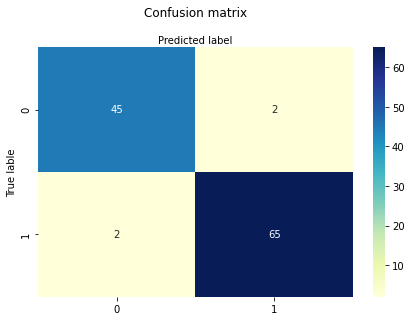

In [170]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True lable')
plt.xlabel('Predicted label')

In [171]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544


In [172]:
# Problem 2
df = pd.DataFrame(breast['data'],columns=breast['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
X_2 = breast.data
Y_2 = breast.target

In [174]:
Y_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [175]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_2,Y_2, test_size = 0.2, random_state=1)

#Converting Traing and Test Data to numpy array
X_train2=np.asarray(X_train2)
Y_train2=np.asarray(Y_train2)
X_test2=np.asarray(X_test2)
Y_test2=np.asarray(Y_test2)
print('X_train dimension= ', X_train2.shape)
print('y_train dimension= ', Y_train2.shape)
print('X_test dimension= ', X_test2.shape)
print('y_test dimension= ', Y_test2.shape)

X_train dimension=  (455, 30)
y_train dimension=  (455,)
X_test dimension=  (114, 30)
y_test dimension=  (114,)


In [176]:
from sklearn.decomposition import PCA
k_max = 31
k_initial = 0
opt_accuracy = 0
accuracy = []
precision = []
recall = []
class_error = []

for k in range(1,k_max):  
    pca = PCA(n_components=k)  # Create and fit PCA object
    pca_train = pca.fit_transform(X_train2)
    pca_test = pca.transform(X_test2)
   
    classifier = LogisticRegression(max_iter=500)  # Logistic Regression Classifier
    classifier.fit(pca_train,Y_train2)
    Y_pred2=classifier.predict(pca_test)
    accuracy.append(metrics.accuracy_score(Y_test2, Y_pred2))
    precision.append(metrics.precision_score(Y_test2, Y_pred2))
    recall.append(metrics.recall_score(Y_test2, Y_pred2))
    class_error.append(1 - metrics.accuracy_score(Y_test2, Y_pred2))
    
    if ((metrics.accuracy_score(Y_test2, Y_pred2))> opt_accuracy):
        opt_accuracy = (metrics.accuracy_score(Y_test2, Y_pred2))
        k_initial = k
    else:
        continue
# Present the optimal accuracy and the corresponding K value
print("the value of K achieves the optimal accuracy is : "+str(k_initial)+" and the Optimal Accuraccy is : "+str(opt_accuracy))

the value of K achieves the optimal accuracy is : 7 and the Optimal Accuraccy is : 0.9473684210526315


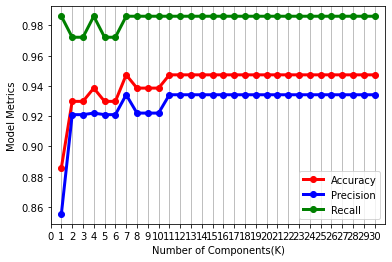

In [177]:
# Plot all model metrics along different ks
fig = plt.figure()
ax = fig.add_subplot(111)
ki = np.arange(1, k_max, step=1)
plt.xticks(np.arange(0, k_max, step=1))
ax.plot(ki, accuracy, color='red', marker='o', linewidth=3, label='Accuracy')
ax.plot(ki, precision, color='blue', marker='o', linewidth=3, label='Precision')
ax.plot(ki, recall, color='green', marker='o', linewidth=3, label='Recall')
plt.xlabel('Number of Components(K)')
plt.ylabel('Model Metrics')
ax.grid(axis='x')

ax.set_xlim(0.0, k_max)

plt.legend()
plt.show()

In [178]:
# print classification report
print(metrics.classification_report(Y_test2, Y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 257.44, 'Predicted label')

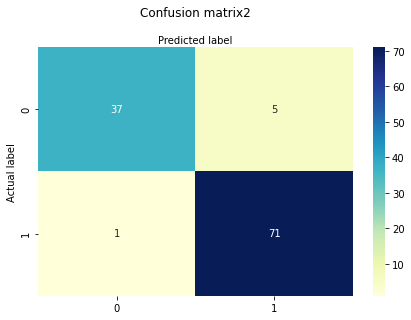

In [198]:
# Create confusion matrix
cnf_matrix2 = metrics.confusion_matrix(Y_test2, Y_pred2)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [199]:
cnf_matrix2

array([[37,  5],
       [ 1, 71]], dtype=int64)

In [181]:
# However, Here is the code for Using PCA only to reduce D from 30 to 2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
New_pca = pca.transform(scaled_data)
scaled_data.shape

(569, 30)

In [182]:
# Reducing the 30 dimensions to just 2 
New_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

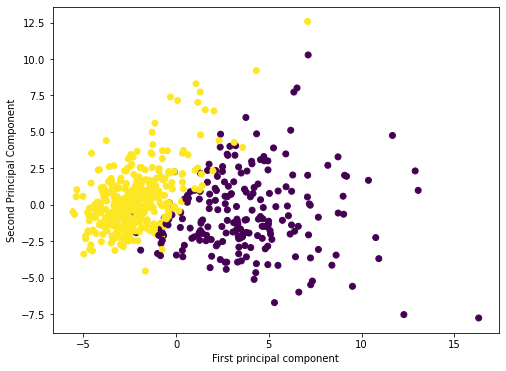

In [183]:
# Ploting the 2 dimentions 
plt.figure(figsize=(8,6))
plt.scatter(New_pca[:,0],New_pca[:,1],c=breast['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [184]:
#the two classes can be easily seperated and presented.
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [185]:
#Problem 3
#use the LDA feature extraction for your training
df = pd.DataFrame(breast['data'],columns=breast['feature_names'])
X_3 = breast.data
Y_3 = breast.target

In [186]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_3,Y_3, test_size = 0.2, random_state=101)

#Converting Traing and Test Data to numpy array
X_train3=np.asarray(X_train3)
Y_train3=np.asarray(Y_train3)
X_test3=np.asarray(X_test3)
Y_test3=np.asarray(Y_test3)
print('X_train3 dimension= ', X_train3.shape)
print('y_train3 dimension= ', Y_train3.shape)
print('X_test3 dimension= ', X_test3.shape)
print('y_test3 dimension= ', Y_test3.shape)

X_train3 dimension=  (455, 30)
y_train3 dimension=  (455,)
X_test3 dimension=  (114, 30)
y_test3 dimension=  (114,)


In [187]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_train3 =scaler.fit_transform(X_train3)
X_test3  = scaler.transform(X_test3)

In [188]:
#Fitting LDA to cancer dataset:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_train = lda.fit_transform(X_train3,Y_train3)
lda_test = lda.transform(X_test3)

In [189]:
from sklearn.naive_bayes import GaussianNB
Classifier3 = GaussianNB().fit(lda_train, Y_train3)

Y_pred3 = Classifier3.predict(lda_test)
Y_pred3

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [190]:
print(metrics.classification_report(Y_test3, Y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [200]:
confusion_matrix(Y_test3,Y_pred3)

array([[40,  2],
       [ 1, 71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

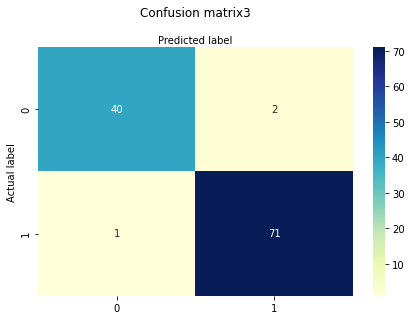

In [203]:
# Create confusion matrix
cnf_matrix3 = metrics.confusion_matrix(Y_test3, Y_pred3)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [192]:
#Problem 4
#use the LDA feature extraction for your training
df = pd.DataFrame(breast['data'],columns=breast['feature_names'])
X_4 = breast.data
Y_4 = breast.target
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_4,Y_4, test_size = 0.2, random_state=101)

#Converting Traing and Test Data to numpy array
X_train4=np.asarray(X_train4)
Y_train4=np.asarray(Y_train4)
X_test4=np.asarray(X_test4)
Y_test4=np.asarray(Y_test4)
print('X_train3 dimension= ', X_train4.shape)
print('y_train3 dimension= ', Y_train4.shape)
print('X_test3 dimension= ', X_test4.shape)
print('y_test3 dimension= ', Y_test4.shape)

X_train3 dimension=  (455, 30)
y_train3 dimension=  (455,)
X_test3 dimension=  (114, 30)
y_test3 dimension=  (114,)


In [193]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_train4 =scaler.fit_transform(X_train4)
X_test4  = scaler.transform(X_test4)

In [194]:
#Fitting LDA to cancer dataset:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_train4 = lda.fit_transform(X_train4, Y_train4)
lda_test4 = lda.transform(X_test4)

In [195]:
# Create an instance of Logistic Regression Classifier, fit the lda data and test the model.
Classifier4 = LogisticRegression().fit(lda_train4,Y_train4)
Y_pred4=Classifier4.predict(lda_test4)

In [196]:
print(metrics.classification_report(Y_test4, Y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [197]:
confusion_matrix(Y_test4,Y_pred4)

array([[41,  1],
       [ 1, 71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

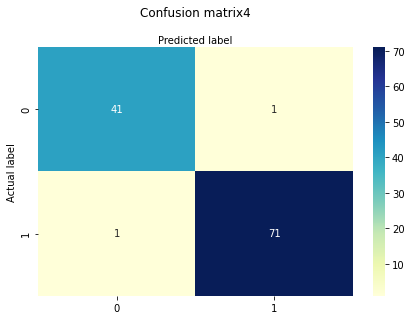

In [204]:
# Create confusion matrix
cnf_matrix4 = metrics.confusion_matrix(Y_test4, Y_pred4)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix4', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')